# Recurrent learning

In this file the network is working with a feedback, online learning is used to make a correction when it might exagerates. 

In [69]:
from data_loading import load_X_Y, plot_results
import numpy as np 
import matplotlib.pyplot as plt 
dpath = '../../dataset/preprocessed/'
file_name = 'A146020302.csv'

In [70]:
from reservoirpy.datasets import to_forecasting
def normalize_data(data):
    # Normalizing data between 0 and 1 column by column
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data, min_vals, max_vals

data = load_X_Y(dpath + file_name)
data, min_vals, max_vals = normalize_data(data)
forecast = 14
x,y= to_forecasting(data[3156:], forecast=forecast)
y = y[:, -1].reshape(-1, 1) # chosing the data that will be used (electricity consuption)
units = 1500 
leak_rate = 0.7792508169512387
spectral_radius = .09321853131680612
input_scaling = .7
connectivity = 0.02
input_connectivity = 0.3
regularization = 1e-1
seed = 42
X_train1, y_train1 = x[:2000], y[:2000]
X_test1, y_test1 = x[2000:], y[2000:]
X_test1 = np.asarray(X_test1) # chosing the data that will be used (electricity consuption)
X_test1 = X_test1.reshape(X_test1.shape[0], -1) # reshaping data that they could be used by reservoir py

In [71]:
from reservoirpy.nodes import RLS
from reservoirpy.nodes import Reservoir 
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)

readout   = RLS(1.7612623782375254)


esn_online = reservoir >> readout

In [72]:
readout = RLS(1.7612623782375254)
outputs_pre = np.zeros((len(X_train1), 1))

for t, (x_t, y_t) in enumerate(zip(X_train1, y_train1)):
    outputs_pre[t] = esn_online.partial_fit(
        x_t.reshape(1, -1),
        y_t.reshape(1, -1)
    )

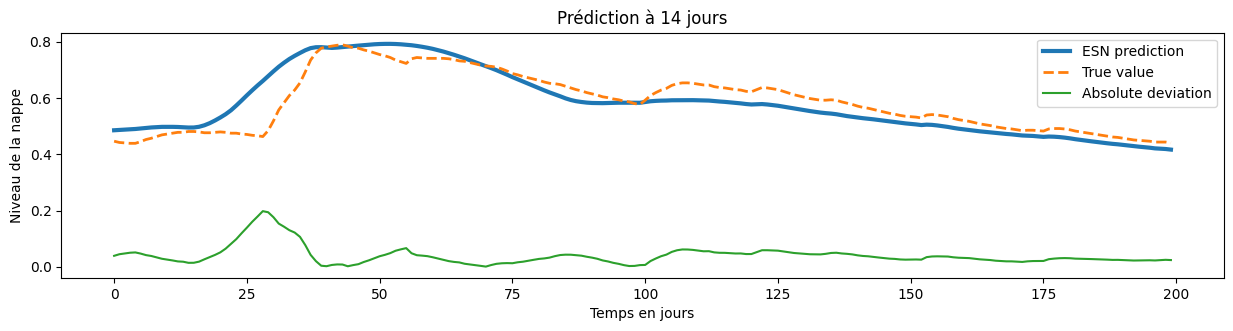

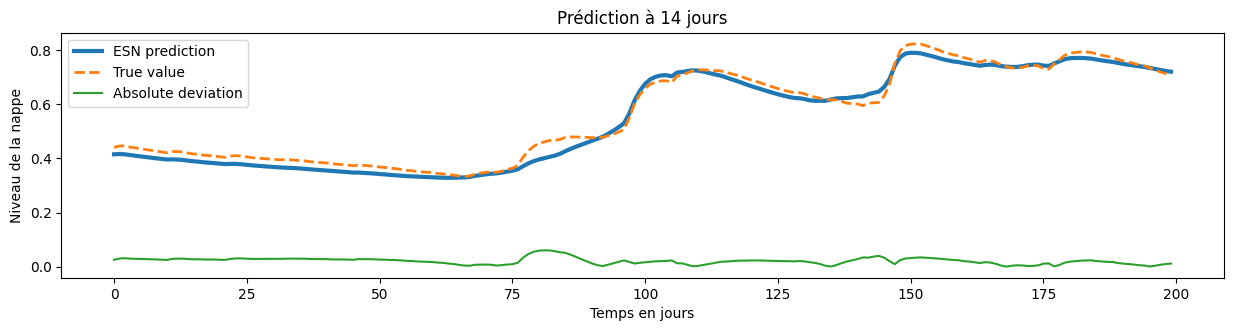

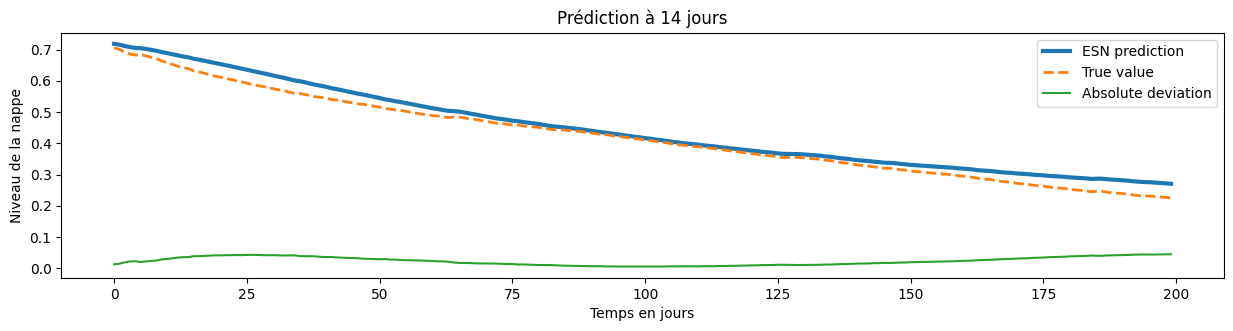

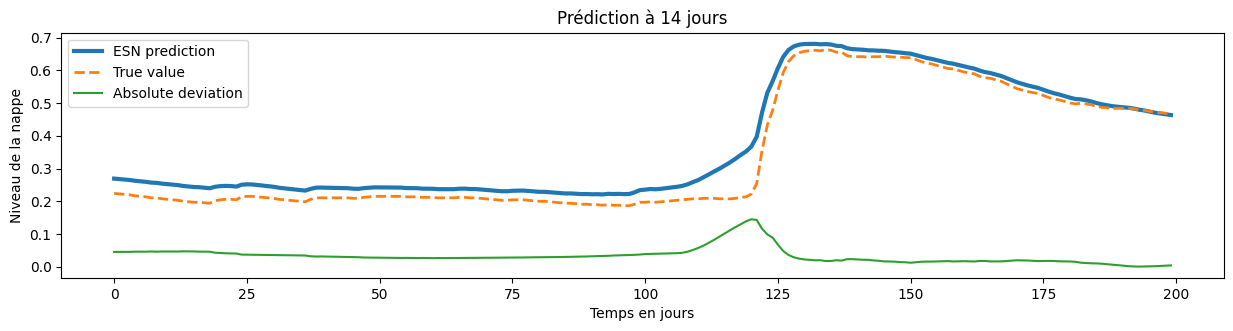

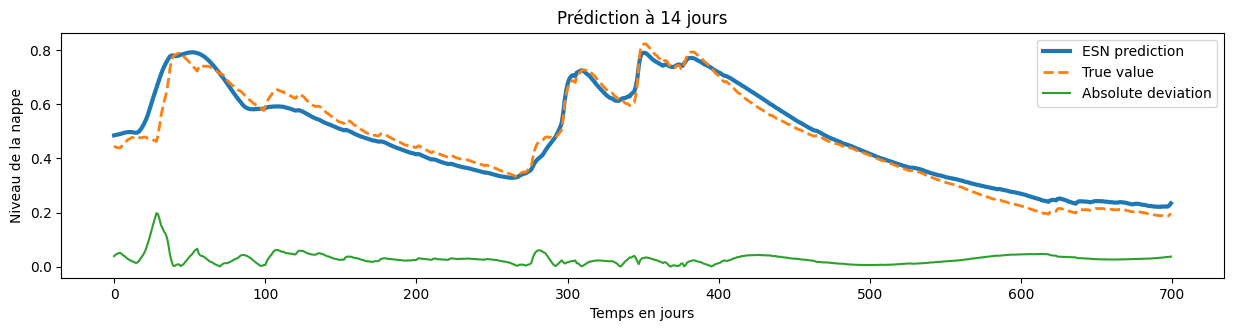

In [73]:
_from = 100
_to = 800
step = 200

for i in range(_from, _to, step):
    plot_results(outputs_pre[i+forecast:], y_train1[i:], forecast, sample=step, diff=True)

plot_results(outputs_pre[_from + forecast:],y_train1[_from:], forecast=forecast, sample=_to - _from, diff=True)


In [74]:

esn_online = reservoir >> readout
esn_online.partial_fit(X_train1, y_train1)
pred_online = esn_online.run(X_test1)

Écart entre moyenne prédiction et moyenne valeur réelle -0.06714668548100546


Affichage des résultats sur des segments de données de taille  200


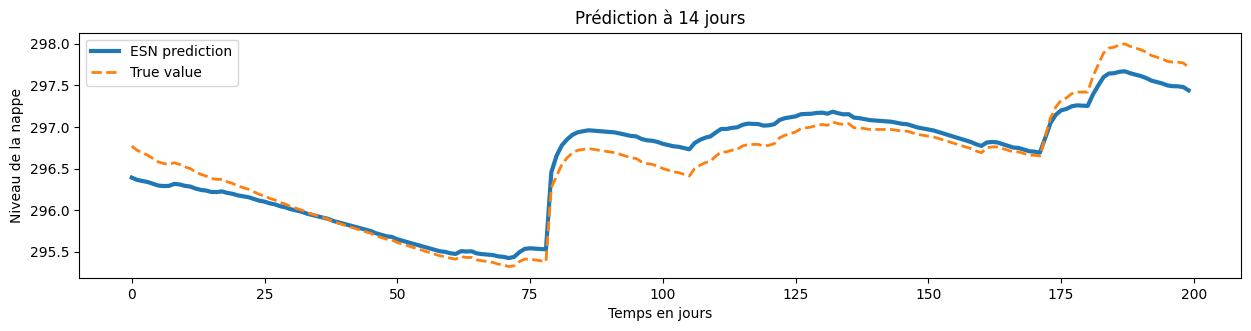

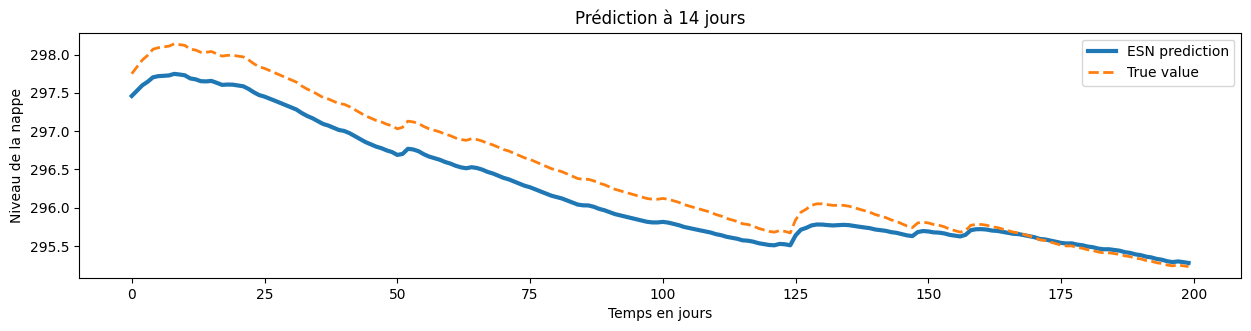

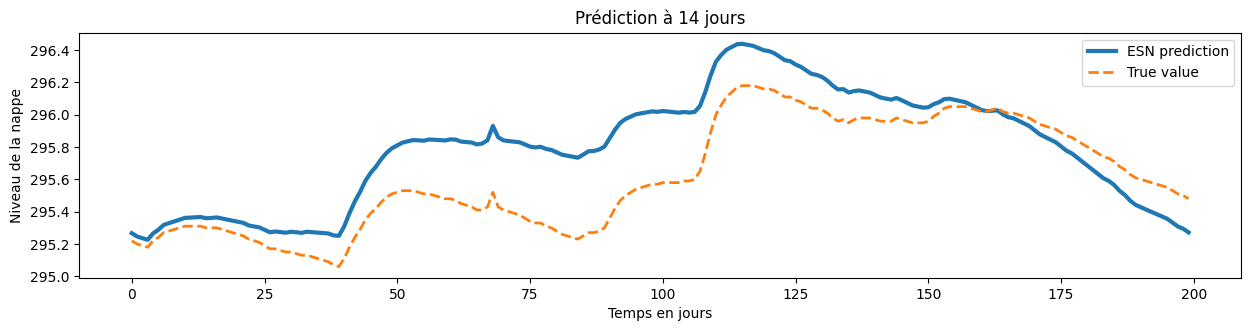

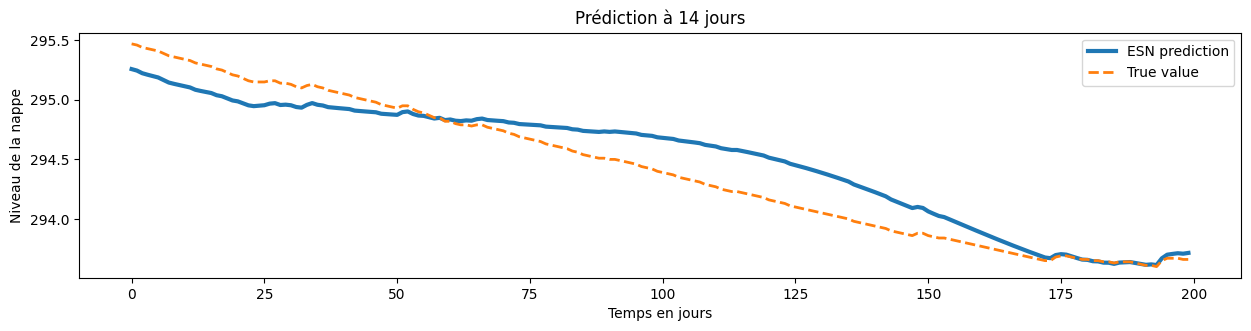

Affichage des résultats sur l'ensemble de la plage de données


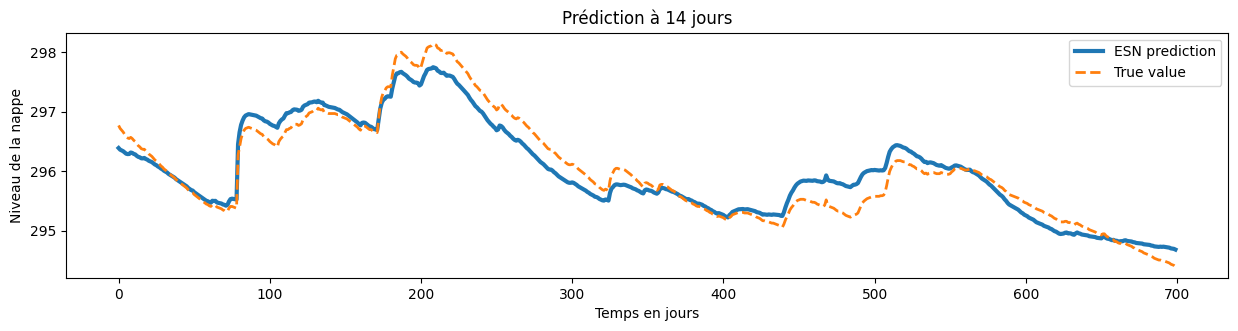

In [75]:
def unnormalize_data(normalized_data, min_vals, max_vals):
    return normalized_data * (max_vals - min_vals) + min_vals


pred_data = unnormalize_data(pred_online, min_vals[-1], max_vals[-1])
y_test_data = unnormalize_data(y_test1, min_vals[-1], max_vals[-1])
print( "Écart entre moyenne prédiction et moyenne valeur réelle", np.mean(y_test_data - pred_data))

_from = 100
_to = 800
step = 200

print("\n\nAffichage des résultats sur des segments de données de taille ", step)
for i in range(_from, _to, step):
    plot_results(pred_data[i+forecast:], y_test_data[i:], forecast, sample=step, diff=False)

print("Affichage des résultats sur l'ensemble de la plage de données")
plot_results(pred_data[_from + forecast:],y_test_data[_from:], forecast=forecast, sample=_to - _from, diff=False)
